## REGRESSION WITH MIDTERM SCORES

## Data loading and set up

In [111]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns 
from matplotlib import pylab as plt
from sklearn.model_selection import train_test_split,KFold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from pandas import DataFrame
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import precision_score, recall_score, accuracy_score, fbeta_score
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn.datasets import make_moons
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import (NeighborhoodComponentsAnalysis,KNeighborsClassifier)
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_moons
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.colors import ListedColormap
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error
from pandas import DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split 
from  sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, fbeta_score
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor

In [77]:
#initiate path and load data
path_to_data = "/Users/anniephan/Desktop/Data_Science_Master/DATA_1030/data1030_project_-portugese-secondary-student-performance/data/student"
mat = pd.read_csv(path_to_data+'/student-mat.csv', sep=";")
por = pd.read_csv(path_to_data+'/student-por.csv', sep=";")

In [78]:
# merge datasets
df = pd.concat([mat,por])

In [79]:
# rename column labels
df.columns = ['school','sex','age','address','family_size','parents_status','mother_education','father_education',
           'mother_job','father_job','reason','guardian','commute_time','study_time','failures','school_support',
          'family_support','paid_classes','activities','nursery','desire_higher_edu','internet','romantic','family_quality',
          'free_time','go_out','weekday_alcohol_usage','weekend_alcohol_usage','health','absences','period1_score','period2_score','final_score']
print(df.columns)

Index(['school', 'sex', 'age', 'address', 'family_size', 'parents_status',
       'mother_education', 'father_education', 'mother_job', 'father_job',
       'reason', 'guardian', 'commute_time', 'study_time', 'failures',
       'school_support', 'family_support', 'paid_classes', 'activities',
       'nursery', 'desire_higher_edu', 'internet', 'romantic',
       'family_quality', 'free_time', 'go_out', 'weekday_alcohol_usage',
       'weekend_alcohol_usage', 'health', 'absences', 'period1_score',
       'period2_score', 'final_score'],
      dtype='object')


In [80]:
# convert final_score to categorical variable # Good:15~20 Fair:10~14 Poor:0~9
df['final_grade'] = 'na'
df.loc[(df.final_score >= 15) & (df.final_score <= 20), 'final_grade'] = 'good' 
df.loc[(df.final_score >= 10) & (df.final_score <= 14), 'final_grade'] = 'fair' 
df.loc[(df.final_score >= 0) & (df.final_score <= 9), 'final_grade'] = 'poor' 
df.head(5)

,school,sex,age,address,family_size,parents_status,mother_education,father_education,mother_job,father_job,...,free_time,go_out,weekday_alcohol_usage,weekend_alcohol_usage,health,absences,period1_score,period2_score,final_score,final_grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,poor
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,poor
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,fair
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,good
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,fair


# Data Preprocessing

In [122]:
# Separate feature matrix and target variable
df_reg = df.drop(columns=["final_grade"])
y_reg = df_reg['final_score'] #predict final grades so make final grades the target variable
X_reg = df_reg.loc[:, df_reg.columns != 'final_score'] 
#print("target variable:",y_reg)
#print("feature matrix:", X_reg.head())

In [123]:
## Split data using Basic Split
random_state = 42

# first split to separate out the training set
X_reg_train, X_reg_other, y_reg_train, y_reg_other = train_test_split(X_reg,y_reg,train_size = 0.6,random_state=random_state)
#print('training set:',X_reg_train.shape, X_reg_train.head(3), y_reg_train.shape, y_reg_train.head(3)) 
#print(X_reg_other.shape, y_reg_other.shape) 

# second split to separate out the validation and test sets
X_reg_val, X_reg_test, y_reg_val, y_reg_test = train_test_split(X_reg_other,y_reg_other,train_size = 0.5,random_state=random_state)
#print('validation set:',X_reg_val.shape, X_reg_val.head(3),y_reg_val.shape, y_reg_val.head(3)) 
#print('test set:', X_reg_test.shape, X_reg_test.head(3), y_reg_test.shape, y_reg_test.head(3)) 

In [124]:
# collect which encoder to use on each feature
# needs to be done manually
onehot_ftrs = ['school','sex','age','address','family_size','parents_status', 
               'mother_job','father_job','reason','guardian','school_support',
               'family_support','paid_classes','activities','nursery','desire_higher_edu','internet','romantic']
minmax_ftrs = ['age','absences']
std_ftrs = ['period1_score','period2_score']

# collect all the encoders
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'), onehot_ftrs),
        ('minmax', MinMaxScaler(), minmax_ftrs),
        ('std', StandardScaler(), std_ftrs)])

clf = Pipeline(steps=[('preprocessor', preprocessor)]) # for now we only preprocess 
                                                       # later on we will add other steps here

X_reg_train_prep = clf.fit_transform(X_reg_train)
X_reg_val_prep = clf.transform(X_reg_val)
X_reg_test_prep = clf.transform(X_reg_test)

print(X_reg_train.shape)
print(X_reg_train_prep.shape)

# the target variable still needs to be preprocessed separately
#le = LabelEncoder()
#y_train_prep = le.fit_transform(y_train)
#y_val_prep = le.transform(y_val)
#y_test_prep = le.transform(y_test)

(626, 32)
(626, 55)


# Hyperparameter Tuning

In [125]:
#df = pd.read_csv("https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt", sep='\t')
#df.head()

#y = df['Y']
#X = df.loc[:, df.columns != 'Y']

mean_test_scores = []
std_test_scores = []
def MLpipe_KFold_RMSE(X,y,preprocessor,ML_algo,param_grid):
    '''
    This function splits the data to other/test (80/20) and then applies KFold with 4 folds to other.
    The RMSE is minimized in cross-validation.
    '''
    test_scores = []
    best_models = []
    
    
    # loop through 10 random states (2 points)
    for i in range(1,10):
    
        # split data to other/test 80/20, and the use KFold with 4 folds (2 points)
       # first split to separate out the test set
        X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,random_state=42*i)
        #print(X_other.shape,y_other.shape)
        #print('test set:',X_test.shape,y_test.shape)

        # do KFold split on other
        kf = KFold(n_splits=4,shuffle=True,random_state=42*i)

        # preprocess the data (1 point)
        pipe = make_pipeline(preprocessor,ML_algo)
        
        # loop through the hyperparameter combinations or use GridSearchCV (2 points)
        ##calculate RMSE evaluation metric
        RMSE = make_scorer(mean_squared_error, squared=False, greater_is_better=False)
        ##create grid search CV with the pipeline, parameter grid, and scoring metric
        grid = GridSearchCV(pipe, param_grid=param_grid,scoring = RMSE,
                        cv=kf, return_train_score = True, n_jobs = -1)
        
        
        # for each combination, calculate the train and validation scores using the evaluation metric
        grid.fit(X_other, y_other)
        
        #save results to a datafrmae
        #results = pd.DataFrame(grid.cv_results_)
        #print(results[['params', 'mean_test_score', 'mean_train_score']])

        # find which hyperparameter combination gives the best validation score (1 point)
        print("best model parameters:", grid.best_params_)
        print('validation score:',grid.best_score_)

        # calculate the test score (1 point)
        best_models.append(grid)
        test_score = mean_squared_error(y_test,best_models[-1].predict(X_test), squared=False)
        print('test score:', test_score)

        # append the test score and the best model to the lists (1 point)
        test_scores.append(test_score)
        
    return best_models, test_scores

**Apply on models**

In [126]:
#1. lasso
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'), onehot_ftrs),
        ('minmax', MinMaxScaler(), minmax_ftrs)])
    
ML_algo = Lasso()
param_grid = {'lasso__alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2]}

models, scores = MLpipe_KFold_RMSE(X_reg,y_reg,preprocessor,ML_algo,param_grid)
print(scores)

#calculate mean and standard deviation of test scores
mean_test_score = np.mean(scores)
std_test_score = np.std(scores)

#append to the list
mean_test_scores.append(mean_test_score)
std_test_scores.append(std_test_score)

print("mean test score:", mean_test_scores)
print("standard deviation test score:", std_test_scores)

best model parameters: {'lasso__alpha': 0.01}
validation score: -3.6657068477726606
test score: 3.695069214127115
best model parameters: {'lasso__alpha': 0.01}
validation score: -3.5994948742273327
test score: 4.026263354038885
best model parameters: {'lasso__alpha': 0.001}
validation score: -3.4743607906502536
test score: 4.33080062551237
best model parameters: {'lasso__alpha': 0.01}
validation score: -3.7215419497793443
test score: 3.464389169250805
best model parameters: {'lasso__alpha': 0.01}
validation score: -3.718136068487915
test score: 3.520099975313247
best model parameters: {'lasso__alpha': 0.01}
validation score: -3.6565427156512817
test score: 3.8286814567352567
best model parameters: {'lasso__alpha': 0.01}
validation score: -3.7322090443402844
test score: 3.541432734951768
best model parameters: {'lasso__alpha': 0.01}
validation score: -3.593049286848858
test score: 4.102910760748988
best model parameters: {'lasso__alpha': 0.01}
validation score: -3.7647471381354367
test 

In [127]:
#2. linear regression with l2 regularization
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'), onehot_ftrs),
        ('minmax', MinMaxScaler(), minmax_ftrs)]) 

ML_algo = Ridge()
param_grid = {'ridge__alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2]}

models, scores = MLpipe_KFold_RMSE(X_reg,y_reg,preprocessor,ML_algo,param_grid)
print(scores)

#calculate mean and standard deviation of test scores
mean_test_score = np.mean(scores)
std_test_score = np.std(scores)

#append to the list
mean_test_scores.append(mean_test_score)
std_test_scores.append(std_test_score)

print("mean test score:", mean_test_scores)
print("standard deviation test score:", std_test_scores)

best model parameters: {'ridge__alpha': 10.0}
validation score: -3.669721481299898
test score: 3.7003999188900387
best model parameters: {'ridge__alpha': 10.0}
validation score: -3.592041948747581
test score: 4.034897807355533
best model parameters: {'ridge__alpha': 1.0}
validation score: -3.4745917759114944
test score: 4.329638753634537
best model parameters: {'ridge__alpha': 10.0}
validation score: -3.724974526524874
test score: 3.453163346748056
best model parameters: {'ridge__alpha': 10.0}
validation score: -3.719696753897033
test score: 3.538147543745812
best model parameters: {'ridge__alpha': 100.0}
validation score: -3.655874319274848
test score: 3.82075744077414
best model parameters: {'ridge__alpha': 10.0}
validation score: -3.7351252879772523
test score: 3.5570793025155476
best model parameters: {'ridge__alpha': 100.0}
validation score: -3.596632373238987
test score: 4.096496869243828
best model parameters: {'ridge__alpha': 10.0}
validation score: -3.7627715077336594
test sco

**Comments**
Best model is ridge alpha = 1, test score = 52.1

In [128]:
#3. linear regression with an elastic net
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'), onehot_ftrs),
        ('minmax', MinMaxScaler(), minmax_ftrs)])
ML_algo = ElasticNet()
param_grid = {"elasticnet__alpha": [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2],
              "elasticnet__l1_ratio": np.linspace(0.1,0.9,5)}

models, scores = MLpipe_KFold_RMSE(X_reg,y_reg,preprocessor,ML_algo,param_grid)
print(scores)

#calculate mean and standard deviation of test scores
mean_test_score = np.mean(scores)
std_test_score = np.std(scores)

#append to the list
mean_test_scores.append(mean_test_score)
std_test_scores.append(std_test_score)

print("mean test score:", mean_test_scores)
print("standard deviation test score:", std_test_scores)

best model parameters: {'elasticnet__alpha': 0.01, 'elasticnet__l1_ratio': 0.9}
validation score: -3.6659179791602696
test score: 3.694792630955127
best model parameters: {'elasticnet__alpha': 0.1, 'elasticnet__l1_ratio': 0.1}
validation score: -3.5927259849628284
test score: 4.008355814444964
best model parameters: {'elasticnet__alpha': 0.01, 'elasticnet__l1_ratio': 0.30000000000000004}
validation score: -3.4743718838233186
test score: 4.317836177159574
best model parameters: {'elasticnet__alpha': 0.01, 'elasticnet__l1_ratio': 0.9}
validation score: -3.7221472607693027
test score: 3.463201936408109
best model parameters: {'elasticnet__alpha': 0.01, 'elasticnet__l1_ratio': 0.9}
validation score: -3.718638901865286
test score: 3.5216968982425088
best model parameters: {'elasticnet__alpha': 0.1, 'elasticnet__l1_ratio': 0.1}
validation score: -3.651496284112
test score: 3.8232963562622873
best model parameters: {'elasticnet__alpha': 0.1, 'elasticnet__l1_ratio': 0.1}
validation score: -3.7

**Comments**
Best model is elastic net alpha = 0.1 and l1_ratio = 0.1, test score = 51.44

In [129]:
#4. RF
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'), onehot_ftrs),
        ('minmax', MinMaxScaler(), minmax_ftrs)])
ML_algo = RandomForestRegressor()
param_grid = {
              'randomforestregressor__max_depth': [1,3,5], #we have 10 X features
                'randomforestregressor__max_features': [0.5,1, 0.1]
              } 
    
models, scores = MLpipe_KFold_RMSE(X_reg,y_reg,preprocessor,ML_algo,param_grid)
print(scores)


#calculate mean and standard deviation of test scores
mean_test_score = np.mean(scores)
std_test_score = np.std(scores)

#append to the list
mean_test_scores.append(mean_test_score)
std_test_scores.append(std_test_score)

print("mean test score:", mean_test_scores)
print("standard deviation test score:", std_test_scores)

best model parameters: {'randomforestregressor__max_depth': 5, 'randomforestregressor__max_features': 0.5}
validation score: -3.598690384274318
test score: 3.6820390046704947
best model parameters: {'randomforestregressor__max_depth': 5, 'randomforestregressor__max_features': 0.1}
validation score: -3.5812647447860884
test score: 3.971971713360318
best model parameters: {'randomforestregressor__max_depth': 5, 'randomforestregressor__max_features': 0.5}
validation score: -3.432861029284001
test score: 4.212718470464008
best model parameters: {'randomforestregressor__max_depth': 5, 'randomforestregressor__max_features': 0.5}
validation score: -3.6739116233506137
test score: 3.477425173936794
best model parameters: {'randomforestregressor__max_depth': 5, 'randomforestregressor__max_features': 0.5}
validation score: -3.6150901801935893
test score: 3.4433784588296934
best model parameters: {'randomforestregressor__max_depth': 5, 'randomforestregressor__max_features': 0.5}
validation score: 

**Comments**
Best model is random forest regressor max_dept = 5 and max_features = -.5, test score = 50.45

In [130]:
#5. SVR
from sklearn.svm import SVR
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'), onehot_ftrs),
        ('minmax', MinMaxScaler(), minmax_ftrs)])
ML_algo = SVR()
param_grid = {'svr__C': np.logspace(-3,4,num=8),'svr__epsilon': [0,1,0.1]}
    
models, scores = MLpipe_KFold_RMSE(X_reg,y_reg,preprocessor,ML_algo,param_grid)
print(scores)


#calculate mean and standard deviation of test scores
mean_test_score = np.mean(scores)
std_test_score = np.std(scores)

#append to the list
mean_test_scores.append(mean_test_score)
std_test_scores.append(std_test_score)

print("mean test score:", mean_test_scores)
print("standard deviation test score:", std_test_scores)

best model parameters: {'svr__C': 10.0, 'svr__epsilon': 1}
validation score: -3.631480093299362
test score: 3.621609928707777
best model parameters: {'svr__C': 10.0, 'svr__epsilon': 1}
validation score: -3.543267062422064
test score: 4.023277322706731
best model parameters: {'svr__C': 10.0, 'svr__epsilon': 1}
validation score: -3.3942014933393128
test score: 4.26533537873122
best model parameters: {'svr__C': 10.0, 'svr__epsilon': 1}
validation score: -3.6982946337576776
test score: 3.38126981786577
best model parameters: {'svr__C': 10.0, 'svr__epsilon': 1}
validation score: -3.618817258284515
test score: 3.4312042423289886
best model parameters: {'svr__C': 1.0, 'svr__epsilon': 1}
validation score: -3.6194471524575693
test score: 3.793747349301585
best model parameters: {'svr__C': 1.0, 'svr__epsilon': 1}
validation score: -3.702034229659945
test score: 3.404689183487551
best model parameters: {'svr__C': 10.0, 'svr__epsilon': 1}
validation score: -3.5254196114208365
test score: 4.0922801

**Comments**
Best model is SVR C = 10 and epsilon = 1, test score = 51.6

In [131]:
#6. KNN Regressor
from sklearn.neighbors import KNeighborsRegressor
ML_algo = KNeighborsRegressor()
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'), onehot_ftrs),
        ('minmax', MinMaxScaler(), minmax_ftrs)])
param_grid = {'kneighborsregressor__n_neighbors': np.arange(1,50,4), 'kneighborsregressor__weights': ['uniform', 'distance']}

models, scores = MLpipe_KFold_RMSE(X_reg,y_reg,preprocessor,ML_algo,param_grid)
print(scores)


#calculate mean and standard deviation of test scores
mean_test_score = np.mean(scores)
std_test_score = np.std(scores)

#append to the list
mean_test_scores.append(mean_test_score)
std_test_scores.append(std_test_score)

print("mean test score:", mean_test_scores)
print("standard deviation test score:", std_test_scores)

best model parameters: {'kneighborsregressor__n_neighbors': 17, 'kneighborsregressor__weights': 'uniform'}
validation score: -3.698104808582039
test score: 3.826262851982344
best model parameters: {'kneighborsregressor__n_neighbors': 49, 'kneighborsregressor__weights': 'distance'}
validation score: -3.6214185344168626
test score: 4.28910196397092
best model parameters: {'kneighborsregressor__n_neighbors': 37, 'kneighborsregressor__weights': 'distance'}
validation score: -3.516413332206306
test score: 4.301963368773572
best model parameters: {'kneighborsregressor__n_neighbors': 41, 'kneighborsregressor__weights': 'distance'}
validation score: -3.75532988683083
test score: 3.531512512102614
best model parameters: {'kneighborsregressor__n_neighbors': 45, 'kneighborsregressor__weights': 'distance'}
validation score: -3.753174081248021
test score: 3.414205687076857
best model parameters: {'kneighborsregressor__n_neighbors': 33, 'kneighborsregressor__weights': 'uniform'}
validation score: -3

Best model for KNN: 
- best model parameters: {'kneighborsregressor__n_neighbors': 13, 'kneighborsregressor__weights': 'distance'}
- validation score: -58.215665294941545
- test score: 50.46210682730428

In [132]:
ML_models = ['lasso regression', 'ride regression', 'elastic net', 'random forest', 'SVR', 'KNN-Regression']

Text(0, 0.5, " mean and standard deviation of each algo's best models")

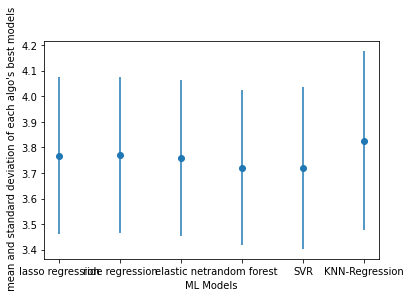

In [133]:
plt.errorbar(ML_models ,mean_test_scores, yerr = std_test_scores, fmt="o")
plt.xlabel("ML Models")
plt.ylabel(" mean and standard deviation of each algo's best models")

**Comments**
Random forest have least mean and standard deviation